# Pandas入门学习课件

内容：
* pandas DataFrame（数据框）
* pandas Series
* 数据的选择
* 案例：Iris 鸢尾花数据
    * 数据的导入和观察
    * 数据选择复习
    * 数据可视化初探

## Pandas DataFrame

我们存储数据最常用的形式是表格
* 表格就是由行与列所构成的一种有序的组织形式
* 表格的第一行一般是变量名称，也称为表头（header）
* 不同的变量可以是不同的数据类型。

 比如下面这个表格罗列了2016年GDP最高的5个国家以及对应的首都，人口(百万)，GDP（万亿美元），和所在大洲
 
 
|country|capital|population|GDP|continent|
|--|--|--|--|--|
|United States|Washington, D.C.|323|19.42|North America|
|China|Beijing|1389|11.8|Asia|
|Japan|Tokyo|127|4.84|Asia|
|Germany|Berlin|83|3.42|Europe|
|United Kingdom|London|66|2.5|Europe|



**问题：如何在python中表示以上这个表格？**
* 在前面我们介绍了二维numpy array。但是numpy array只能存储一种数据类型，但是上面的表格同时有数值变量和字符串。
* 我们需要使用pandas包来处理
    * pandas是数据科学中最常用的包之一，可以高效的处理各种数据格式。
    * pandas是基于numpy构建的
    * 我们将重点介绍pandas中的series和DataFrame

### 从字典创建一个DataFrame
* 回忆前面课程，我们需要键（key）和值（value）来定义一个字典

In [1]:
# 首先产生一个叫gdp的字典
gdp = {"country":["United States", "China", "Japan", "Germany", "United Kingdom"],
       "capital":["Washington, D.C.", "Beijing", "Tokyo", "Berlin", "London"],
       "population":[323, 1389, 127, 83, 66],
       "gdp":[19.42, 11.8, 4.84, 3.42, 2.5],
       "continent":["North America", "Asia", "Asia", "Europe", "Europe"]}

In [6]:
# 按惯例将pandas简称为pd
import pandas as pd

In [3]:
gdp_df = pd.DataFrame(gdp)
gdp_df #列索引为第一行，行索引为0-4

,country,capital,population,gdp,continent
0,United States,"Washington, D.C.",323,19.42,North America
1,China,Beijing,1389,11.80,Asia
2,Japan,Tokyo,127,4.84,Asia
3,Germany,Berlin,83,3.42,Europe
4,United Kingdom,London,66,2.50,Europe


In [4]:
# 我们可以通过index选项添加自定义的行标签(label)
# 使用column选项可以选择列的顺序
gdp_df = pd.DataFrame(gdp, columns = ["country", "capital", "population", "gdp", "continent"],
                     index = ["us", "cn", "jp", "de", "uk"])
gdp_df

,country,capital,population,gdp,continent
us,United States,"Washington, D.C.",323,19.42,North America
cn,China,Beijing,1389,11.80,Asia
jp,Japan,Tokyo,127,4.84,Asia
de,Germany,Berlin,83,3.42,Europe
uk,United Kingdom,London,66,2.50,Europe


### 修改行和列的标签

In [5]:
# 也可以使用index和columns直接修改
gdp_df.index = ["US", "CN", "JP", "DE", "UK"]
gdp_df.columns = ["Country", "Capital", "Population", "GDP", "Continent"]
gdp_df

,Country,Capital,Population,GDP,Continent
US,United States,"Washington, D.C.",323,19.42,North America
CN,China,Beijing,1389,11.80,Asia
JP,Japan,Tokyo,127,4.84,Asia
DE,Germany,Berlin,83,3.42,Europe
UK,United Kingdom,London,66,2.50,Europe


### 增加一列数据

In [6]:
# 增加rank列，表示他们的GDP处在前5位
gdp_df["rank"] = "Top5 GDP"
# 增加国土面积变量,以百万公里计（数据来源：http://data.worldbank.org/）
gdp_df["Area"] = [9.15, 9.38, 0.37, 0.35, 0.24]
gdp_df

,Country,Capital,Population,GDP,Continent,rank,Area
US,United States,"Washington, D.C.",323,19.42,North America,Top5 GDP,9.15
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37
DE,Germany,Berlin,83,3.42,Europe,Top5 GDP,0.35
UK,United Kingdom,London,66,2.50,Europe,Top5 GDP,0.24


## Pandas series
* pandas中的series对象是另一个重要的数据结构
* 你可以将其视为一个一维的DataFrame或者一个一维数组（array）加上一个索引（index）
* 在这节课后半部分，我们将展示series在数据过滤和分组运算中起到作用

In [7]:
# 一个最简单的series
series = pd.Series([2,4,5,7,3], index=['a','b','c','d','e'])
# 默认的索引是0到4
series

a    2
b    4
c    5
d    7
e    3
dtype: int64

In [8]:
# 当我们使用点操作符来查看一个变量时，返回的是一个pandas series
# 在后续的布尔筛选中使用点方法可以简化代码
# US,...,UK是索引
gdp_df.GDP

US    19.42
CN    11.80
JP     4.84
DE     3.42
UK     2.50
Name: GDP, dtype: float64

In [9]:
# 可以直接查看索引index
gdp_df.GDP.index

Index(['US', 'CN', 'JP', 'DE', 'UK'], dtype='object')

In [10]:
# 类型是pandas.core.series.Series
type(gdp_df.GDP)

pandas.core.series.Series

In [11]:
#返回一个布尔型的series，在后面讲到的DataFrame的布尔索引中会大量使用
gdp_df.GDP > 4

US     True
CN     True
JP     True
DE    False
UK    False
Name: GDP, dtype: bool

In [12]:
# 我们也可以将series视为一个长度固定且有顺序的字典，一些用于字典的函数也可以用于series
gdp_dict = {"US": 19.42, "CN": 11.80, "JP": 4.84, "DE": 3.42, "UK": 2.5}
gdp_series = pd.Series(gdp_dict)
gdp_series

US    19.42
CN    11.80
JP     4.84
DE     3.42
UK     2.50
dtype: float64

In [13]:
# 判断 ’US' 标签是否在gdp_series中
"US" in gdp_series

True

## 数据的选择
* 我们可以使用[[]]来选择需要的列（如果只是用[]则产生一个series）
* 使用[]来选取需要的行
* 使用loc和iloc方法，选择行和列
* 使用布尔索引筛选数据

In [14]:
# 使用变量名加[[]]选取列
gdp_df[["Country"]]

,Country
US,United States
CN,China
JP,Japan
DE,Germany
UK,United Kingdom


In [15]:
# 可以同时选取多列
gdp_df[["Country", "GDP"]]

,Country,GDP
US,United States,19.42
CN,China,11.80
JP,Japan,4.84
DE,Germany,3.42
UK,United Kingdom,2.50


In [16]:
# 如果只是用[]则产生series
type(gdp_df["Country"])

pandas.core.series.Series

In [17]:
# 使用句点符号也能获取某一列的Series
gdp_df.Country

US     United States
CN             China
JP             Japan
DE           Germany
UK    United Kingdom
Name: Country, dtype: object

In [18]:
# 行选取和2d数组类似
# 如果使用[]选取行，切片方法唯一的选项
gdp_df[2:5] # 终索引是不被包括的！

,Country,Capital,Population,GDP,Continent,rank,Area
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37
DE,Germany,Berlin,83,3.42,Europe,Top5 GDP,0.35
UK,United Kingdom,London,66,2.50,Europe,Top5 GDP,0.24


### loc方法
* 是一种基于行标签和列标签选取数据的方法
* 可以选取特定行或列，也可以同时指定所需要的行与列
* 和二维numpy array的格式非常类似

In [19]:
# 在上面例子中，我们使用行索引选取行，能不能使用行标签实现选取呢？
# loc方法正是基于标签选取数据的方法
gdp_df.loc[["JP","DE"]]

,Country,Capital,Population,GDP,Continent,rank,Area
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37
DE,Germany,Berlin,83,3.42,Europe,Top5 GDP,0.35


In [20]:
# 以上例子选取了所有的列
# 我们可以加入需要的列标签
gdp_df.loc[["JP","DE"],["Country", "GDP", "Continent"]]

,Country,GDP,Continent
JP,Japan,4.84,Asia
DE,Germany,3.42,Europe


In [21]:
# 选取所有的行，我们可以使用:来表示选取所有的行
gdp_df.loc[:, ["Country", "GDP", "Continent"]]

,Country,GDP,Continent
US,United States,19.42,North America
CN,China,11.80,Asia
JP,Japan,4.84,Asia
DE,Germany,3.42,Europe
UK,United Kingdom,2.50,Europe


### iloc方法
* 和loc方法不同的地方是，iloc是基于行列索引进行数据选择而不是标签
* 具体使用方法和loc类似，用行/列索引代替标签

In [22]:
# 等价于gdp_df.loc[["JP","DE"]]
gdp_df.iloc[[2,3]]

,Country,Capital,Population,GDP,Continent,rank,Area
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37
DE,Germany,Berlin,83,3.42,Europe,Top5 GDP,0.35


In [23]:
gdp_df.loc[["JP","DE"],["Country", "GDP", "Continent"]]
gdp_df.iloc[[2,3],[0,3,4]]

,Country,GDP,Continent
JP,Japan,4.84,Asia
DE,Germany,3.42,Europe


In [24]:
# 等价于gdp_df.loc[:, ["country", "GDP", "continent"]]
gdp_df.iloc[:, [0,3,4]]

,Country,GDP,Continent
US,United States,19.42,North America
CN,China,11.80,Asia
JP,Japan,4.84,Asia
DE,Germany,3.42,Europe
UK,United Kingdom,2.50,Europe


### 使用布尔索引(boolean Indexing)筛选数据
* 我们可以使用pandas series来获取一个boolean series
* 布尔索引的使用和二维numpy array类似
* 可以结合[]或者loc一起使用

In [25]:
# 选出亚洲国家，下面两行命令产生一样的结果
gdp_df[gdp_df.Continent == "Asia"]

,Country,Capital,Population,GDP,Continent,rank,Area
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37


In [26]:
gdp_df.loc[gdp_df.Continent == "Asia"]

,Country,Capital,Population,GDP,Continent,rank,Area
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37


In [27]:
# 选出gdp大于3兆亿美元的欧洲国家
gdp_df[(gdp_df.Continent == "Europe") & (gdp_df.GDP > 3)]

,Country,Capital,Population,GDP,Continent,rank,Area
DE,Germany,Berlin,83,3.42,Europe,Top5 GDP,0.35


## 作业5-1：
1. 选出亚洲或者北美洲的国家记录 (提示：使用 isin 方法)
2. 选出gdp大于4兆亿美元的国家

## 案例：Iris 鸢尾花数据

让我们来看一下经典的iris数据
* 鸢尾花卉数据集， 来源 [UCI 机器学习数据集](http://archive.ics.uci.edu/ml/datasets/Iris)
* 它最初是埃德加·安德森采集的
* 四个特征被用作样本的定量分析，它们分别是花萼(sepal)和花瓣(petal)的长度(length)和宽度(width)
<img src="iris.jpeg">

### 数据的导入和观察

In [19]:
# 用列表存储列标签
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# 读取数据，并指定每一列的标签
iris = pd.read_csv('iris.txt', names=col_names)

# 使用head/tail查看数据的头和尾
iris.head(10)   # 查看开头10行数据

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [20]:
# 使用info方法查看数据的总体信息
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [21]:
# 使用shape可以查看DataFrame的行数与列数
# iris有150个观察值，5个变量
iris.shape

(150, 5)

In [31]:
# 这里的品种(species)是分类变量(categorical variable)
# 可以使用unique方法来对查看series中品种的名字
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
# 统计不同品种的数量
# 使用DataFrame的value_counts方法来实现
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

### 关于变量的种类
* 第一类是数量型(quantitative)变量，其中又可以进一步分为两种
    * 连续型的（continuous），比如一个人的身高和体重，当天的温度等等。
    * 离散型的（discrete），比如一个医院医生的人数，每天航班的次数等等。
* 第二类变量是性质型（qualitative）变量，也称为分类变量（categorical）其中也可以进一步分为两类
    * 无序型变量，比如人的性别，上面列子中鸢尾花的品种。
    * 有序型（ordinal），比如人的教育（本科，硕士，博士），收入分组（低，中，高收入）。
    

### 数据选择复习

* 例1：选取花瓣数据，即 petal_length 和 petal_width 这两列

In [23]:
# 方法一：使用[[ ]]
petal = iris[['petal_length', 'petal_width']]
petal.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [24]:
# 方法二：使用 .loc[ ]
petal = iris.loc[:, ['petal_length', 'petal_width']]
petal.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [25]:
# 方法三：使用 .iloc[ ]
petal = iris.iloc[:, 2:4]
petal.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


* 例2：选取行索引为5-10的数据行

In [36]:
# 方法一：使用 [ ] 
iris[5:11]

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


In [37]:
# 方法二：使用 .iloc[]
iris.iloc[5:11, :]

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


* 例3：选取品种为 Iris-versicolor 的数据

In [38]:
versicolor = iris[iris.species == 'Iris-versicolor']
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


### 数据可视化初探
* 数据可视化一般是数据分析的第一步，让我们对数据有一个直观的了解。
* 通过可视化，我们往往可以观察到一些规律，这些观察到的规律可以对后续的建模起到指导作用。
* 可视化也是和非技术背景人沟通最有效的手段之一，不是所有人都懂得模型，但是大部分都可以理解图形

In [26]:
# 设置在notebook中直接展示图形输出
# 注意DataFrame也是基于matplotlib作图的
%matplotlib inline 

# 设置图片清晰度
%config InlineBackend.figure_format = 'retina'

### 散点图

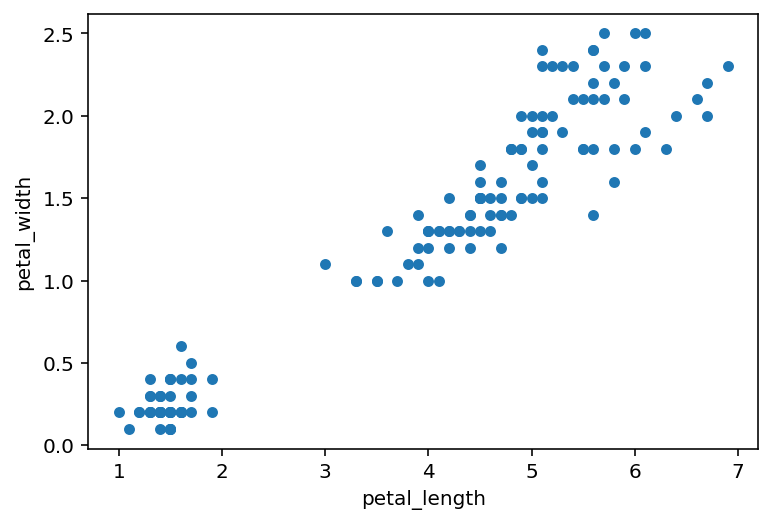

In [27]:
# 我们首先画散点图（sactter plot），x轴上画出花瓣的长度，y轴上画出花瓣的宽度
# 我们观察到什么呢？
iris.plot(kind='scatter', x="petal_length", y="petal_width")

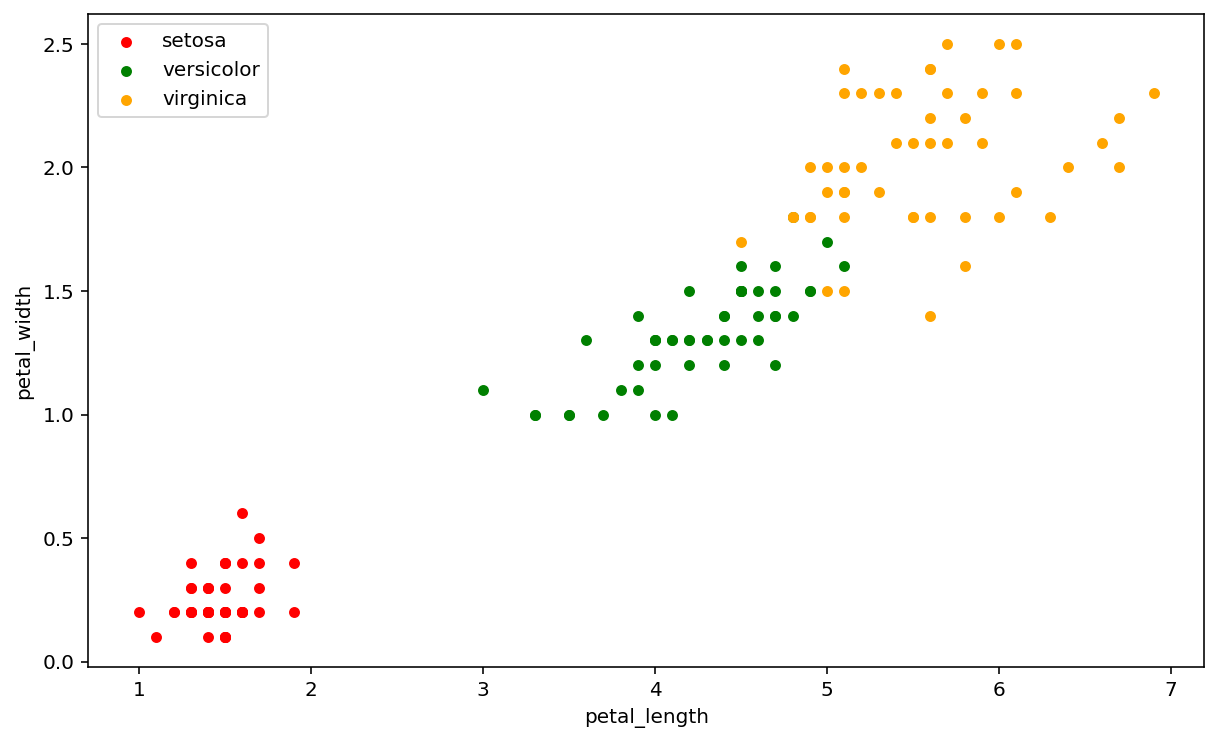

In [28]:
# 使用布尔索引的方法分别获取三个品种的数据
setosa = iris[iris.species == 'Iris-setosa']
versicolor = iris[iris.species == 'Iris-versicolor']
virginica = iris[iris.species == 'Iris-virginica']

ax = setosa.plot(kind='scatter', x="petal_length", y="petal_width", color='Red', label='setosa', figsize=(10,6))
versicolor.plot(kind='scatter', x="petal_length", y="petal_width", color='Green', ax=ax, label='versicolor')
virginica.plot(kind='scatter', x="petal_length", y="petal_width", color='Orange', ax=ax, label='virginica')

### 箱图

In [42]:
# 使用mean()方法获取花瓣宽度均值
iris.petal_width.mean()

1.1986666666666672

In [43]:
# 使用median()方法获取花瓣宽度的中位数
iris.petal_width.median()

1.3

In [44]:
# 可以使用describe方法来总结数值变量
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


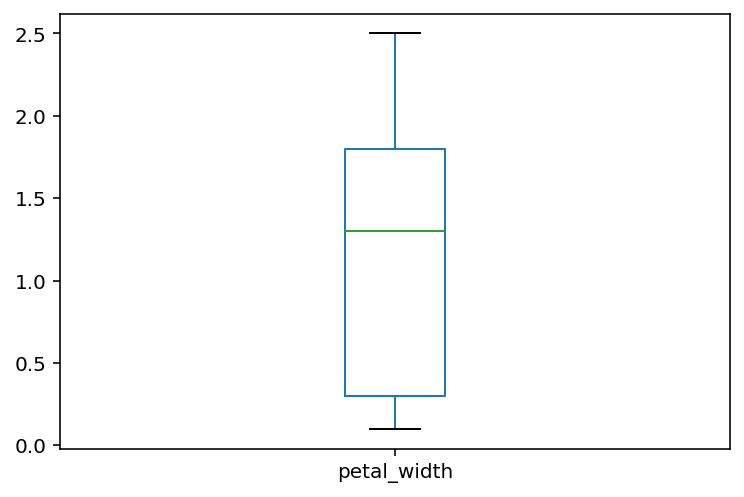

In [45]:
# 绘制花瓣宽度的箱图
# 箱图展示了数据中的中位数，四分位数，最大值，最小值
iris.petal_width.plot(kind='box')

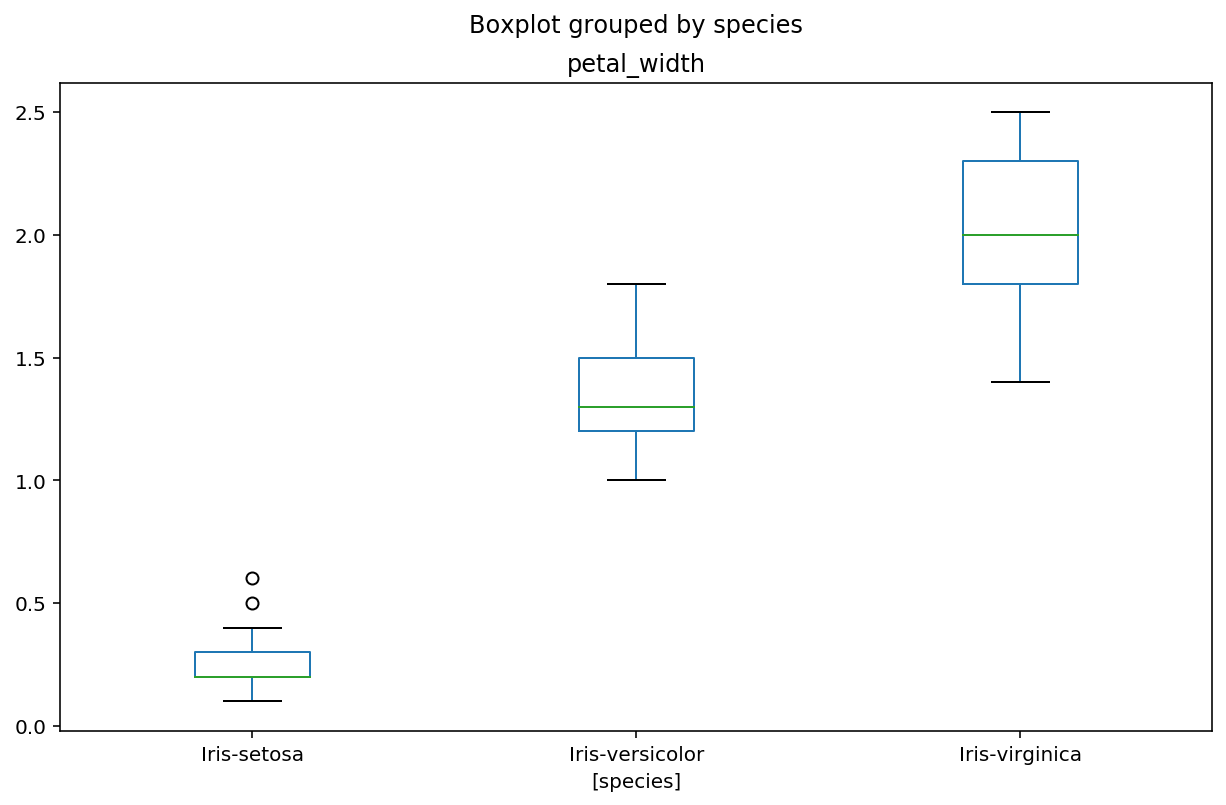

In [46]:
# 按品种分类，分别绘制不同品种花瓣宽度的箱图
iris[['petal_width', 'species']].boxplot(grid=False, by='species', figsize=(10, 6))

In [47]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


## 作业5-2：
1. 模仿上述例子，画出花萼宽度和长度的散点图，使用品种划分数据
2. 模仿上述例子，画出花萼的长度的箱线图，使用品种划分数据

## 作业5-3：

根据课程学习内容，对提供的 WordIndex.csv 数据进行简单的查看和可视化分析。

In [30]:
df = pd.read_csv('WorldIndex.csv')
df.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528
1,Angola,Africa,52.666098,3695.793748,27859305
2,Benin,Africa,59.720707,783.947091,10575952
3,Botswana,Africa,64.487415,6532.060501,2209197
4,Burundi,Africa,57.107049,303.681022,10199270


## 本课索引



|代码|说明|
|:--|:--|
||**---导入pandas---**|
|import pandas as pd    | 导入pandas包并将之简写为pd  |
|||
|||
||**---创建pandas中的DataFrame和Series---**|
|pd.DataFrame()  | 创建 pandas DataFrame |
|pd.Series()  |  创建 pandas Series |
|||
||**---数据选择---**|
|df.column_name  |  选取数据框的某一列，生成Series格式数据，df为数据框，column_name为列名|
|df['column_name'] | 选取数据框的某一列，生成Series格式数据  |
|df[['column_name']] | 选取数据框的列，生成DataFrame格式数据 |
|df.loc[ ] | 使用行和列的标签索引选取数据 |
|df.iloc[ ] | 使用行和列的数值索引选取数据 |
|||
|||
||**---导入csv格式数据---**|
|pd.read_csv() | 在pandas中读取csv文本格式数据 |
|||
|||
||**---观察数据框---**|
| df.head() | 查看数据框df的前几行数据 |
| df.tail() | 查看数据框df的最后几行数据 |
| df.info() | 获取数据框df的信息 |
| df.describe() |获取数据框df的各项统计值 |
| df.index | 查看数据框df的行索引 |
| df.columns| 查看数据框df的列名 |
| df.shape | 查看数据框df的形状，行数和列数 |
|||
|||
||**---Series数据的一些统计分析函数---**|
| se.unique() | 获取Series数据中的数值种类，一般用于分类数据，这里se为Series格式数据 |
| se.value_counts() |统计Series数据中的数值种类及其对应的数据个数 |
| se.mean() | 计算Series数据的均值 |
| se.std() | 计算Series数据的标准差 |
| se.median() | 计算Series数据的中位数 |
| se.max() | 计算Series数据的最大值 |
| se.min() | 计算Series数据的最小值 |
| se.count() | 计算Series数据的个数 |
|||
||**---pandas绘图函数---**|
| df.plot(kind='scatter', x= , y= )  | 绘制散点图 |
| df.plot(kind='box') | 绘制箱图 |
| df.boxplot(by='column_name') |绘制箱图，并按 column_name 这一列的分类数值进行分组 |
